# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import numpy as np

# An ImageSet class - just to encapsulate the data
class ImageSet:
    """
        images: the features of the neural network (X)
                a list of numpy arrays
        signs:  the labels of the neural network (y)
                a list of ints that correspond to indexes in the signnames.csv
                
        * Each image corresponds to the sign with the same index
    """
    def __init__(self, images, signs):
        self.images = images
        self.signs  = signs
        # a list where the sign is the index, and the image is the value
        self.image_counts = np.bincount(signs)
        
    def count(self):
        assert(len(self.images) == len(self.signs))
        return len(self.images)

    def img_shape(self):
        return self.images.shape[1:]
    
    def unique_signs(self):
        return len(np.unique(self.signs))
    
    def images_by_sign(self, sign):
        indexes = list(np.where(self.signs == sign)[0])
        return [self.images[i] for i in indexes]
        

In [2]:
# Load pickled data
import pickle
        
signs_folder    = 'traffic-signs-data/'
training_file   = signs_folder + 'train.p'
validation_file = signs_folder + 'valid.p'
testing_file    = signs_folder + 'test.p'

def data_loader(f):
    data = pickle.load(f)
    return ImageSet(data['features'], data['labels'])

with open(training_file, mode='rb') as f:
    train_init = data_loader(f)
with open(validation_file, mode='rb') as f:
    valid_init = data_loader(f)
with open(testing_file, mode='rb') as f:
    test_init  = data_loader(f)
    
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
import numpy as np

n_train     = train_init.count()

n_valid     = valid_init.count()

n_test      = test_init.count()

image_shape = train_init.img_shape()

n_classes   = train_init.unique_signs()

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [4]:
import csv

# Get all the sign names.  It is a list of tuples where
# the first index is the sign, and the second is the sign name
sign_names = []
with open('signnames.csv', newline='') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if (i != 0):
            sign_names.append((int(row[0]), row[1]))

assert(len(sign_names) == n_classes)

Output 5 random image sets to visually check that the data loaded correctly
---------------------------------------------------------------------------

Priority road  (1890 samples)


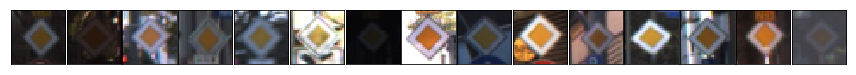

Yield  (1920 samples)


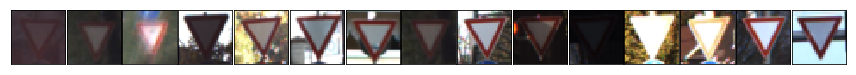

Stop  (690 samples)


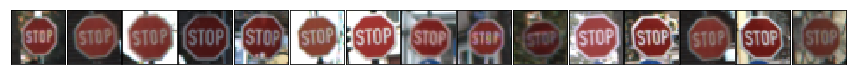

No vehicles  (540 samples)


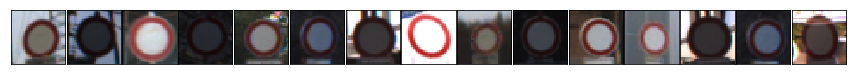

Vehicles over 3.5 metric tons prohibited  (360 samples)


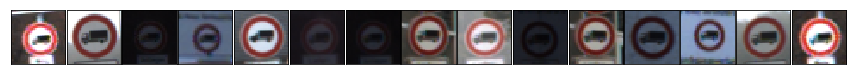

In [5]:
import matplotlib.pyplot as plt
import random
%matplotlib inline
    
def plot_images(imset, cmap = None):
    """Show images in rows that correspond to sign types"""
    imgs_per_row = 15
    
    names = sign_names[12:17]

    for [sign, sign_name] in names:
        print("{0}  ({1} samples)".format(sign_name, imset.image_counts[sign]))

        images = random.sample(imset.images_by_sign(sign), imgs_per_row)

        fig = plt.figure(figsize = (imgs_per_row, 1))
        fig.subplots_adjust(hspace = 0, wspace = 0)

        for i in range(imgs_per_row):
            image = images[i]
            axis = fig.add_subplot(1, 15, i+1, xticks=[], yticks=[])

            if cmap == None: axis.imshow(image)
            else: axis.imshow(image.squeeze(), cmap=cmap)
        
        plt.show()


print('Output 5 random image sets to visually check that the data loaded correctly')
print('---------------------------------------------------------------------------')
print()
plot_images(train_init)

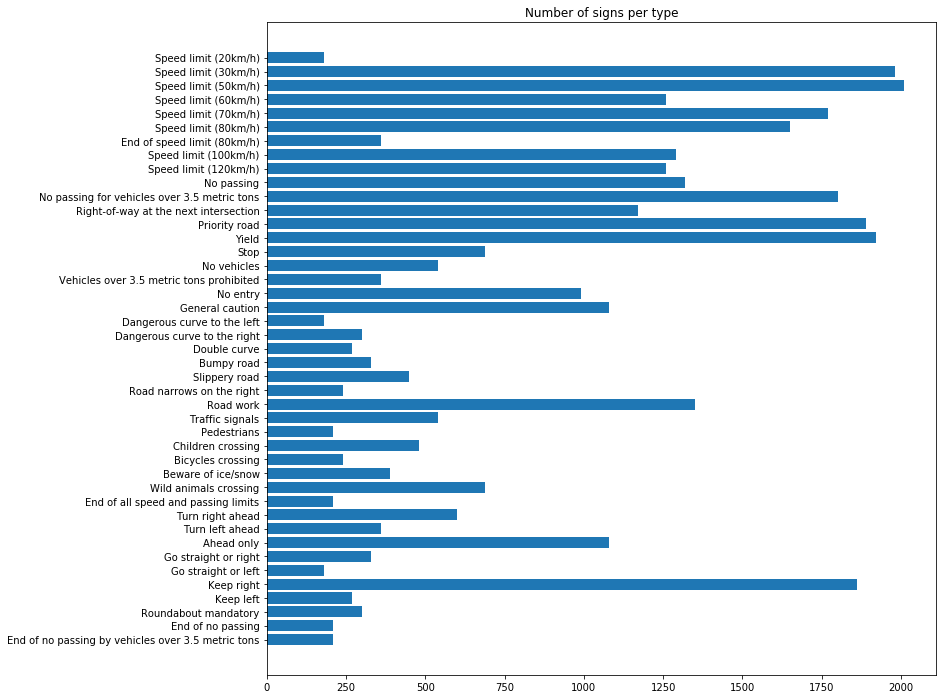

In [6]:
from itertools import groupby

def plot_sign_totals(imset):
    fig, ax = plt.subplots(figsize=(12, 12))

    ax.barh(np.arange(len(sign_names)), imset.image_counts)
    ax.set_yticks(np.arange(len(sign_names)))
    ax.set_yticklabels([n[1] for n in sign_names])
    ax.invert_yaxis()
    ax.set_title('Number of signs per type')
    plt.show()
    
plot_sign_totals(train_init)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Setup the pre-processing functions, and test it

In [7]:
# Preprocess Image.  All images that enter this system will be pre-processed.
import cv2

def gray_scale(imgs):
        return np.sum(imgs/3, axis=3, keepdims=3)

def normalize(imgs):
    return (imgs - 128) / 128

def preprocess_img(images):
    return normalize(gray_scale(images))

train_pre = ImageSet(
    preprocess_img(train_init.images),
    np.copy(train_init.signs)
)
valid_pre = ImageSet(
    preprocess_img(valid_init.images),
    np.copy(valid_init.signs)
)
test_pre = ImageSet(
    preprocess_img(test_init.images),
    np.copy(test_init.signs)
)

In [8]:
# Augment Image.  In some sign categories, there are not enough images.
# Copies of these images are then made, and augmented/transformed to provide additional examples.
def augment_img(im):
    def warp(img):
        dx, dy = np.random.randint(-1.7, 1.8, 2)
        matrix = np.float32([[1, 0, dx], [0, 1, dy]])
        x, y, _ = im.shape
        return cv2.warpAffine(img, matrix, (x, y))
    
    def transform(img):
        rand_high = random.randint(27, 32)
        rand_low  = random.randint(0, 5)
        p1 = np.float32([[0,0],[32,0],[0,32],[32,32]])
        p2 = np.float32([
            [0, 0],
            [rand_high, rand_low],
            [rand_low, 32],
            [32, rand_high]
        ])
        matrix = cv2.getPerspectiveTransform(p1, p2)
        return cv2.warpPerspective(img, matrix, (32,32))
    
    def rotate(img):
        tilt = random.randint(-12, 12)
        x, y, _ = img.shape
        matrix = cv2.getRotationMatrix2D((x/2, y/2), tilt, 1)
        return cv2.warpAffine(img, matrix, (x, y))
        
    return np.reshape(warp(transform(rotate(im))), (32, 32, 1))

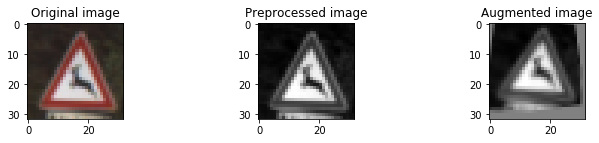

In [9]:
def print_transformation():
    i = 500 # random.randint(0, len(train_init.images))
    ims = train_init.images[i]
    sign = train_init.signs[i]

    plt.figure(figsize=(10, 10))
    plt.subplot(1, 5, 1)
    plt.title("Original image", wrap=True)
    plt.imshow(ims)
    
    plt.subplot(1, 5, 3)
    plt.title("Preprocessed image", wrap=True)
    plt.imshow(train_pre.images[i].squeeze(), cmap='gray')
    
    plt.subplot(1, 5, 5)
    plt.title("Augmented image", wrap=True)
    plt.imshow(augment_img(train_pre.images[i]).squeeze(), cmap='gray')
                                             
print_transformation()                                             

### Pre-process the data sets

In [10]:
import math

def preprocess_images2(imset, no_augment=False):
    more_X = []
    more_y = []

    new_counts_train = imset.image_counts
    for i in range(imset.count()):
        sign = imset.signs[i]
        if(new_counts_train[sign] < 3000):
            for j in range(3):
                more_X.extend(augment_img(imset.images[i]))
                more_y.extend([sign, sign, sign])
    
    more_X = np.concatenate((imset.images, more_X), axis=0)
    more_y = np.concatenate((imset.signs, more_y), axis=0)
    return ImageSet(more_X, more_y)

def preprocess_images(imset, no_augment=False):
    images = []
    signs = []
    max_signs_per_class = max(imset.image_counts)
    
    for sign in range(imset.unique_signs()):
        images_per_sign = imset.images_by_sign(sign)
        # the multiplier determine how many extra images should be added and augmented
        # *if the multiplier is 1, then no additional images will be added
        multiplier = int(max_signs_per_class / imset.image_counts[sign])
        for img in images_per_sign:
            for i in range(multiplier):
                im = img if i == 0 else augment_img(img)
                signs.append(sign)
                images.append(im)

    images2, signs2 = shuffle(np.array(images), np.array(signs))

    return ImageSet(images2, signs2)

Check that the number of signs per type are similar to one another
------------------------------------------------------

Output 5 random image sets to visually check that the images were processed correctly
-------------------------------------------------------------------------------------

74217
Priority road  (1890 samples)


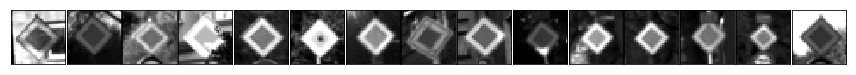

Yield  (1920 samples)


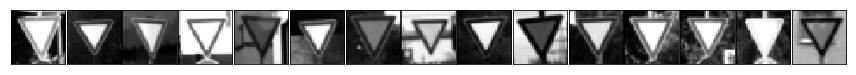

Stop  (1380 samples)


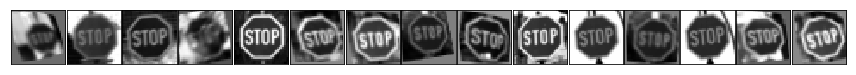

No vehicles  (1620 samples)


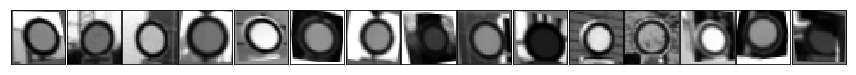

Vehicles over 3.5 metric tons prohibited  (1800 samples)


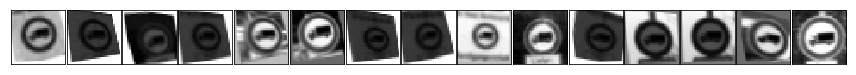

In [11]:
from sklearn.utils import shuffle

train_ext = preprocess_images(train_pre)

print('Check that the number of signs per type are similar to one another')
print('------------------------------------------------------')
# plot_sign_totals(train_ext)
print()

print('Output 5 random image sets to visually check that the images were processed correctly')
print('-------------------------------------------------------------------------------------')
print()
print(len(train_ext.images))
plot_images(train_ext, cmap='gray')

### Model Architecture

In [12]:
# Setup Tensorflow
import tensorflow as tf
from tensorflow.contrib.layers import flatten

In [13]:
# Architecture helpers
def get_dimension(feats):
    return feats.get_shape().as_list()[-1]


def conv2d(name):
    def func(feats, weights, strides=1):
        return tf.nn.conv2d(feats, weights, strides=[1, strides, strides, 1],
                            padding='VALID', name=name)
    return func
    

def layer(feats, combine, filters, out_depth, filter_size = None):
    """Allows to abstract a layer
        
    A layer is either a convolutional one or a fully connected one.
    Each layer also has many possible filters (like dropout etc)
    """
    weights = tf.Variable(get_weights(get_dimension(feats), out_depth, filter_size))
    biases = tf.Variable(tf.zeros(out_depth))
    conv = tf.nn.bias_add(combine(feats, weights), biases)
    for f in filters:
        conv = f(conv)
    return conv


# Convolutional Layer
def conv_layer(feats, filters, out_depth, filter_size, name):
    return layer(feats, conv2d(name), filters, out_depth, filter_size)


# Fully Connected Layer
def fc_layer(feats, filters, out_depth):
    return layer(feats, tf.matmul, filters, out_depth)


def relu(feats):
    return tf.nn.relu(feats)


def dropout(feats):
    return tf.nn.dropout(feats, KEEP_PROB)


def max_pool(feats):
    return tf.nn.max_pool(feats, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')


def get_weights(in_depth, out_depth, filter_size = None):
    mu = 0
    sigma = 0.1

    shape = (in_depth, out_depth) if filter_size is None \
            else (filter_size[0], filter_size[1], in_depth, out_depth)

    return tf.truncated_normal(shape = shape, mean = mu, stddev = sigma)

In [14]:
# Architecture flow defined here
def LeNet(feats):    
    mu    = 0
    sigma = 0.1
    
    conv1 = conv_layer(feats, [relu, max_pool], 6, (5, 5), 'conv1')
    
    conv2 = conv_layer(conv1, [relu, max_pool], 16, (5, 5), 'conv2')
    
    conv3 = conv_layer(conv1, [relu, max_pool, flatten], 400, (5, 5), 'conv3')
    
    fc1   = fc_layer(conv3, [relu, dropout], 120)
    
    fc2   = fc_layer(fc1, [relu, dropout], 84)
    
    fc3   = fc_layer(fc2, [], n_classes)
    
    return fc3

In [15]:
# Constants
EPOCHS = 32
BATCH_SIZE = 160
KEEP_PROB = 0.7

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [16]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1), name='x')
y = tf.placeholder(tf.int32, (None), name='y')
keep_prob = tf.placeholder(tf.float32, name='keep_prob')
one_hot_y = tf.one_hot(y, n_classes, name='one_hot_y')

In [17]:
# Training Pipeline
rate = 0.0005

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [18]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [19]:
errors = list()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = train_ext.count()
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(train_ext.images, train_ext.signs)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: KEEP_PROB})
            
        validation_accuracy = evaluate(valid_pre.images, valid_pre.signs)
        training_accuracy = evaluate(train_ext.images, train_ext.signs)
        
        errors.append((validation_accuracy, training_accuracy))
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print()
        
    saver.save(sess, './lenet.ckpt')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.617
Training Accuracy = 0.639

EPOCH 2 ...
Validation Accuracy = 0.793
Training Accuracy = 0.812

EPOCH 3 ...
Validation Accuracy = 0.839
Training Accuracy = 0.874

EPOCH 4 ...
Validation Accuracy = 0.871
Training Accuracy = 0.910

EPOCH 5 ...
Validation Accuracy = 0.896
Training Accuracy = 0.929

EPOCH 6 ...
Validation Accuracy = 0.910
Training Accuracy = 0.945

EPOCH 7 ...
Validation Accuracy = 0.918
Training Accuracy = 0.957

EPOCH 8 ...
Validation Accuracy = 0.921
Training Accuracy = 0.964

EPOCH 9 ...
Validation Accuracy = 0.923
Training Accuracy = 0.968

EPOCH 10 ...
Validation Accuracy = 0.929
Training Accuracy = 0.973

EPOCH 11 ...
Validation Accuracy = 0.941
Training Accuracy = 0.976

EPOCH 12 ...
Validation Accuracy = 0.941
Training Accuracy = 0.982

EPOCH 13 ...
Validation Accuracy = 0.944
Training Accuracy = 0.980

EPOCH 14 ...
Validation Accuracy = 0.944
Training Accuracy = 0.983

EPOCH 15 ...
Validation Accuracy = 0.943
Tra

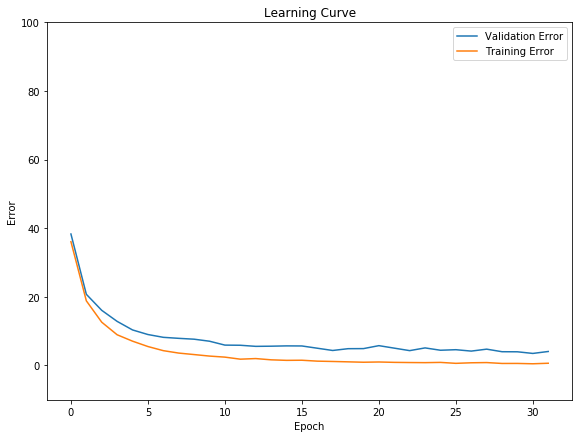

In [20]:
plt.figure(figsize=(8,6))
plt.title('Learning Curve')
plt.plot([(1 - el[0])*100 for el in errors])
plt.plot([(1 - el[1])*100 for el in errors])
plt.ylim([-10,100])
plt.legend(['Validation Error', 'Training Error'])
plt.tight_layout()
plt.savefig('plots/learning_curve.png')
plt.ylabel('Error')
plt.xlabel('Epoch');

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

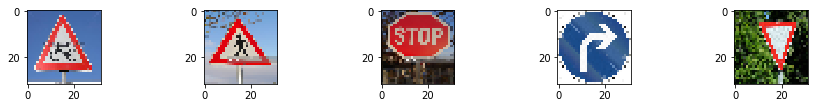

In [21]:
import matplotlib.image as mpimg

test_image_names = ['bicycle.jpg', 'pedestrian.jpg', 'stop.jpg', 'turn-right.jpg', 'yield.jpg']
test_image_signs = [29, 27, 14, 33, 13]
test_images_init = []


plt.figure(figsize=(14, 14))
for i, name in enumerate(test_image_names):
    img = cv2.cvtColor(
        cv2.resize(
            cv2.imread('test-signs/' + name),
            (32, 32)
        ),
        cv2.COLOR_BGR2RGB
    )
    
    plt.subplot(1, 9, i * 2 + 1)
    plt.imshow(img, cmap='gray')

    test_images_init.append(img)

test_images = preprocess_img(np.array(test_images_init))

### Predict the Sign Type for Each Image

In [22]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
from IPython.core.display import display, HTML

prediction_operation = tf.argmax(logits, 1)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
 
    predicted_logits = sess.run(logits, feed_dict={x: test_images, keep_prob: 1.0})

    predicted_labels = np.argmax(predicted_logits, axis=1)

    table_body = ''
    table_header = '<tr><th>Name</th><th>Sign</th><th>Prediction</th><th>Success</th></tr>'
    for i in range(len(test_images)):
        table_body += '<tr><td>{0}</td><td>{1}</td><td>{2}</td><td>{3}</td></tr>'.format(
            test_image_names[i],
            sign_names[test_image_signs[i]][1],
            sign_names[predicted_labels[i]][1],
            'True' if predicted_labels[i] == test_image_signs[i] else 'False'
        )
    display(HTML('<table>' + table_header + table_body + '</table>'))

Name,Sign,Prediction,Success
bicycle.jpg,Bicycles crossing,Slippery road,False
pedestrian.jpg,Pedestrians,Pedestrians,True
stop.jpg,Stop,Bicycles crossing,False
turn-right.jpg,Turn right ahead,Turn right ahead,True
yield.jpg,Yield,Yield,True


### Analyze Performance

In [23]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver = tf.train.Saver()
    saver.restore(sess, "./lenet.ckpt")
    test_accuracy = evaluate(test_pre.images, test_pre.signs)
    print("Test Accuracy = {:.0f}%".format(test_accuracy*100))

Test Accuracy = 93%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [24]:
def print_prob(sign_name, index, top5):
    table_body = ''
    style = ''
    table_header = '<tr><th colspan="2" style="text-align:left">' + sign_name + '</th></tr>'
    for pi in range(5):
        table_body += '<tr><td>{0}</td><td>{1}</td></tr>'.format(
           sign_names[top5[1][index][pi]][1],
           '{0:.0f}%'.format(top5[0][index][pi]*100)
        )
    display(HTML('<table width="320px" style="margin-bottom:12px; border:1px solid black;">' +
        table_header + table_body + '</table>'))

with tf.Session() as sess:
    softmax = tf.nn.softmax(predicted_logits)
    top5 = sess.run(tf.nn.top_k(softmax, k=5))
    for ti in range(len(test_images)):
        print_prob(test_image_names[ti], ti, top5)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [25]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    # print(tf_activation.eval(session=sess,feed_dict={x : image_input}))
    print(type(image_input))
    activation = tf_activation.eval(session= tf.get_default_session(), feed_dict={x: image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [27]:
print("Loading model...")
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    print("Model loaded.")
    
    conv1 = sess.graph.get_tensor_by_name('conv1:0')

    # outputFeatureMap(test_images[1].reshape(1, 32, 32, 1), conv1, sess)

Loading model...
Model loaded.
